In [1]:
import pandas as pd
import numpy as np
from jupyter_client.adapter import code_to_line
%matplotlib inline
import matplotlib.pyplot as plt
import  seaborn as  sns
sns.set(rc={'figure.figsize': (9, 6)})


In [2]:
bdir = 'ML contest\\'
events_data = pd.read_csv(bdir + 'event_data_train.zip',
                          compression='zip')
submission_data = pd.read_csv(bdir + 'submissions_data_train.zip',
                              compression='zip')

bdir = 'ML contest fin2\\'
events_data_testfin = pd.read_csv(bdir + 'events_data_test.csv')
submission_data_testfin = pd.read_csv(bdir + 'submission_data_test.csv')

# events_data_testfin = pd.read_csv('https://stepik.org/media/attachments/course/4852/events_data_test.csv')
# submission_data_testfin = pd.read_csv('https://stepik.org/media/attachments/course/4852/submission_data_test.csv')

In [3]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data_testfin['date'] = pd.to_datetime(events_data_testfin.timestamp, unit='s')

In [4]:
events_data_testfin.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274768 entries, 0 to 274767
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   step_id    274768 non-null  int64         
 1   timestamp  274768 non-null  int64         
 2   action     274768 non-null  object        
 3   user_id    274768 non-null  int64         
 4   date       274768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 10.5+ MB


In [5]:
events_data['day'] = events_data.date.dt.date
events_data_testfin['day'] = events_data.date.dt.date

In [8]:
events_data_testfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274768 entries, 0 to 274767
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   step_id    274768 non-null  int64         
 1   timestamp  274768 non-null  int64         
 2   action     274768 non-null  object        
 3   user_id    274768 non-null  int64         
 4   date       274768 non-null  datetime64[ns]
 5   day        274768 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 12.6+ MB


In [12]:
events_data_testfin.action = events_data_testfin.action.astype('category')
events_data_testfin.step_id = events_data_testfin.step_id.astype('category')


In [13]:
events_data_testfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274768 entries, 0 to 274767
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   step_id    274768 non-null  category      
 1   timestamp  274768 non-null  int64         
 2   action     274768 non-null  category      
 3   user_id    274768 non-null  int64         
 4   date       274768 non-null  datetime64[ns]
 5   day        274768 non-null  object        
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 9.2+ MB


Text(0.5, 1.0, 'Количество уникальных пользователей в день')

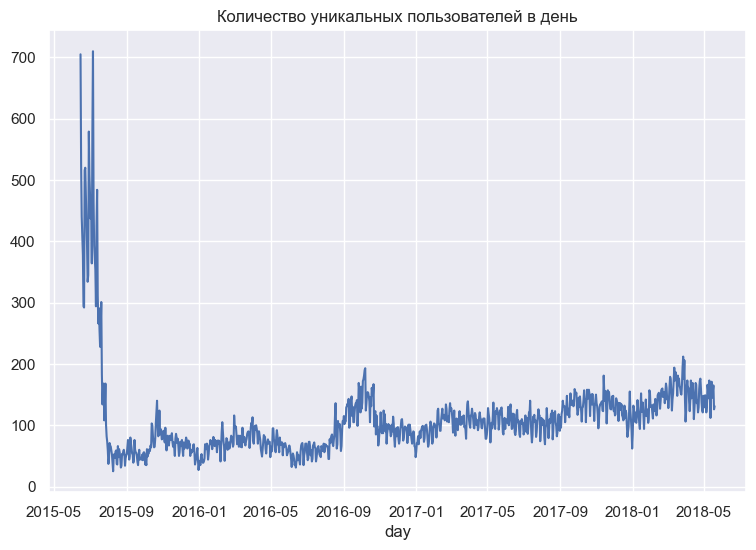

In [6]:
events_data.groupby('day') \
    .user_id.nunique().plot()
plt.title('Количество уникальных пользователей в день')

Text(0.5, 1.0, 'количество пройденных степов (всеми пользователями)')

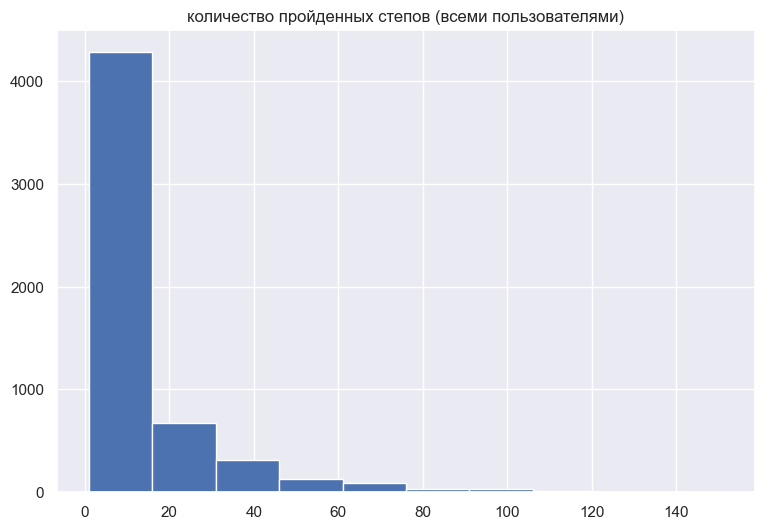

In [247]:
events_data_testfin[events_data_testfin.action == 'passed']\
    .groupby('user_id',as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns={'step_id':'passed_steps'})\
    ['passed_steps'].hist()
plt.title('количество пройденных степов (всеми пользователями)')

In [248]:
user_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()
user_events_data_testfin = events_data_testfin.pivot_table(index='user_id',
                                                        columns='action',
                                                        values='step_id',
                                                        aggfunc='count',
                                                        fill_value=0).reset_index()

array([[<AxesSubplot:title={'center':'passed'}>,
        <AxesSubplot:title={'center':'discovered'}>]], dtype=object)

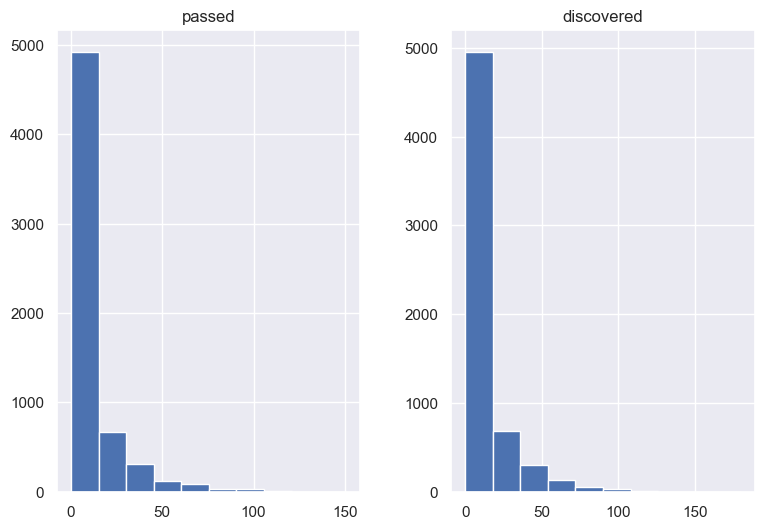

In [249]:
user_events_data_testfin[['passed','discovered']].hist()

In [250]:
submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit='s')
submission_data['day'] = submission_data.date.dt.date

submission_data_testfin['date'] = pd.to_datetime(submission_data_testfin.timestamp, unit='s')
submission_data_testfin['day'] = submission_data_testfin.date.dt.date

In [251]:
submission_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [252]:
user_scores = submission_data.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0).reset_index()

user_scores_testfin = submission_data_testfin.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0).reset_index()

In [253]:
gap_data = events_data[['user_id','day','timestamp']] \
    .drop_duplicates(subset=['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

gap_data_testfin = events_data_testfin[['user_id','timestamp']] \
    .sort_values('timestamp') \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data_testfin = pd.Series(np.concatenate(gap_data_testfin, axis=0))


In [254]:
gap_data_testfin

0         0
1         0
2         0
3         0
4         0
         ..
268579    3
268580    0
268581    0
268582    0
268583    0
Length: 268584, dtype: int32

<AxesSubplot:>

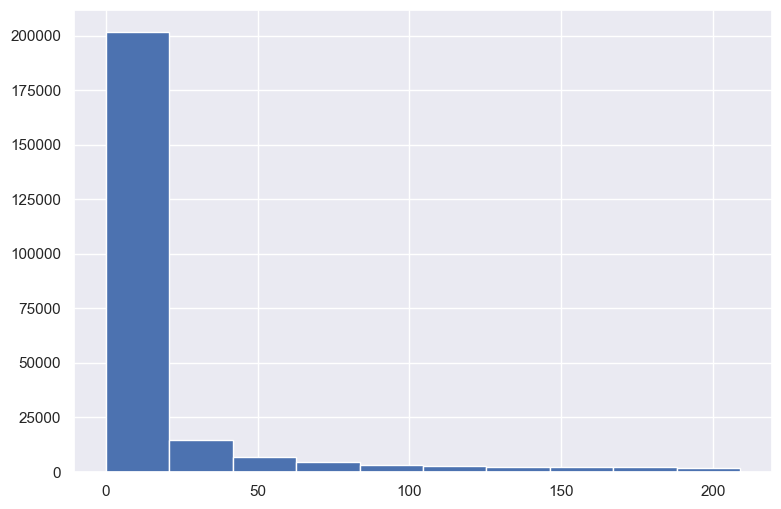

In [255]:
gap_data_testfin[gap_data_testfin < 210].hist()
# gap_data_testfin.hist()

In [256]:
gap_data.quantile(0.90)

1583366.0000000028

In [257]:
gap_data_testfin.quantile(0.90)

210.0

In [258]:
events_data_testfin.tail()

,step_id,timestamp,action,user_id,date,day
274763,158433,1545846175,discovered,3649,2018-12-26 17:42:55,2015-06-30
274764,158433,1545846175,passed,3649,2018-12-26 17:42:55,2015-06-30
274765,158433,1545846283,viewed,20953,2018-12-26 17:44:43,2015-06-30
274766,158433,1545846283,discovered,20953,2018-12-26 17:44:43,2015-06-30
274767,158433,1545846283,passed,20953,2018-12-26 17:44:43,2015-06-30


In [259]:
now = 1526772811
now_testfin = 1545846283
drop_out_threshold = 18*24*60*60


users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}) \
    .rename(columns={'timestamp':'last_timestamp'})
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

users_data_testfin = events_data_testfin.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}) \
    .rename(columns={'timestamp':'last_timestamp'})
users_data_testfin['is_gone_user'] = (now_testfin - users_data_testfin.last_timestamp) > drop_out_threshold

In [260]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [261]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [262]:
users_data = users_data.merge(user_scores, on='user_id', how='outer')
users_data = users_data.fillna(0)
users_data = users_data.merge(user_events_data, how='outer')

In [263]:
users_data_testfin = users_data_testfin.merge(user_scores_testfin, on='user_id', how='outer')
users_data_testfin = users_data_testfin.fillna(0)
users_data_testfin = users_data_testfin.merge(user_events_data_testfin, how='outer')

In [264]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [265]:
users_days_testfin = events_data_testfin.groupby('user_id').day.nunique().to_frame().reset_index()

In [266]:
# users_data = users_data.merge(users_days, how='outer')

In [267]:
users_data['passed_corse'] = users_data.passed > 40
users_data_testfin['passed_corse'] = users_data_testfin.passed > 40

In [268]:
users_data_testfin.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
passed_corse,,,,,,,,,
False,5816,5816,5816,5816,5816,5816,5816,5816,5816
True,368,368,368,368,368,368,368,368,368


In [269]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,True
3,5,1499859939,True,2.0,2.0,11,11,4,12,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,True
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,False


In [270]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)
user_min_time_testfin = events_data_testfin.groupby('user_id', as_index=False) \
    .agg({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)

In [271]:
users_data = users_data.merge(user_min_time, how='outer')
users_data_testfin = users_data_testfin.merge(user_min_time_testfin, how='outer')

In [272]:
events_data_train = pd.DataFrame()

In [273]:
events_data = events_data.merge(user_min_time,how='outer')
events_data['time_from_start'] = events_data.timestamp - events_data.min_timestamp

events_data_testfin = events_data_testfin.merge(user_min_time_testfin,how='outer')
events_data_testfin['time_from_start'] = events_data_testfin.timestamp - events_data_testfin.min_timestamp

In [274]:
learning_time_threshold = 3 * 24 * 60 * 60

events_data_train = events_data[events_data.time_from_start <= learning_time_threshold]
events_data_train_tesfin = events_data_testfin[events_data_testfin.time_from_start <= learning_time_threshold]


In [275]:
users_min_submission = submission_data.sort_values(['user_id', 'timestamp'], ascending=True) \
    .drop_duplicates(['user_id'])[['user_id','timestamp']] \
    .rename(columns={'timestamp':'user_min_timestamp'})
submission_data = submission_data.merge(users_min_submission,how='outer')
submission_data_train = submission_data[submission_data.timestamp - submission_data.user_min_timestamp <= learning_time_threshold]


users_min_submission_tesfin = submission_data_testfin.sort_values(['user_id', 'timestamp'], ascending=True) \
    .drop_duplicates(['user_id'])[['user_id','timestamp']] \
    .rename(columns={'timestamp':'user_min_timestamp'})
submission_data_testfin = submission_data_testfin.merge(users_min_submission_tesfin,how='outer')
submission_data_train_testfin = submission_data_testfin[submission_data_testfin.timestamp - submission_data_testfin.user_min_timestamp <= learning_time_threshold]

# Модель

In [276]:
Source = 'testData'
if Source == 'OldData':
    submission_data_train_target = submission_data_train
    events_data_train_target = events_data_train
    users_data_target = users_data
else:
    submission_data_train_target = submission_data_train_testfin
    events_data_train_target = events_data_train_tesfin
    users_data_target = users_data_testfin

In [277]:
X = submission_data_train_target.groupby('user_id').day.nunique().to_frame()\
    .reset_index()\
    .rename(columns={'day':'days'})

In [278]:
steps_tried = submission_data_train_target.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id':'steps_tried'})

In [279]:
X = X.merge(steps_tried, on='user_id',how='outer')

In [280]:
X = X.merge(submission_data_train_target.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0).reset_index())

In [281]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [282]:
X = X.merge(events_data_train_target.pivot_table(index='user_id',
                                           columns='action',
                                           values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()[['user_id','viewed']], how='outer')

In [283]:
X = X.fillna(0)

In [284]:
X = X.merge(users_data_target[['user_id','passed_corse','is_gone_user']], how='outer')

In [285]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [286]:
X = X.set_index('user_id')

In [287]:
y = X.passed_corse.map(int)

In [288]:
X = X.drop(['passed_corse','is_gone_user'],axis=1)

In [289]:
y

user_id
12       0
13       1
15       0
21       1
35       0
        ..
26743    0
26745    0
26768    0
26791    0
26800    0
Name: passed_corse, Length: 5277, dtype: int64

In [290]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [291]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10),
             # 'min_samples_split': range(2, 10),
             # 'min_samples_leaf': range(1, 10)
             }

clf = DecisionTreeClassifier()
search = GridSearchCV(clf, parametrs, cv=5)

In [292]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [293]:
search.fit(X_train, y_train)
best_tree = search.best_estimator_

In [294]:
print(search.best_params_)
print(best_tree.score(X_train,y_train))
print(best_tree.score(X_test,y_test))

{'criterion': 'gini', 'max_depth': 2}
0.9878359264497878
0.983926521239954


In [295]:
from sklearn.metrics import precision_score
from sklearn import metrics


predictions = best_tree.predict(X_test)
precision_score_value = precision_score(predictions,y_test,average='micro')
print(precision_score_value)
print(metrics.f1_score(y_test,predictions))
fpr, tpr, thresholds =  metrics.roc_curve(y_test, predictions, pos_label=2)
print(metrics.auc(fpr, tpr))

0.983926521239954
0.890625
nan


C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [296]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn import tree

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

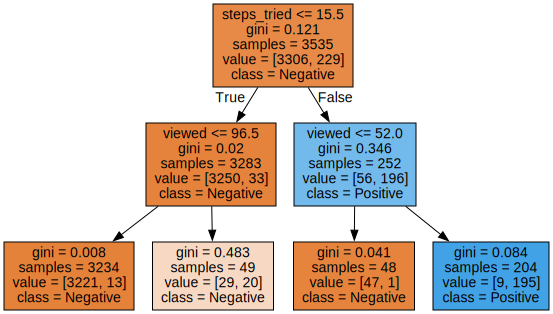

In [297]:
graph = Source(tree.export_graphviz(best_tree, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [298]:
from sklearn import metrics

def all_metrics(model, X_test, y_test):
    observations = y_test
    prediction = model.predict(X_test)

    true_positive = np.logical_and(prediction, observations)
    false_positive = np.logical_and(prediction, np.logical_not(observations))
    true_negative = np.logical_and(np.logical_not(prediction), np.logical_not(observations))
    false_negative = np.logical_and(np.logical_not(prediction), observations)

    tp, fp, tn, fn = (x.sum() for x in (true_positive, false_positive, true_negative, false_negative))
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (recall * precision) / (recall + precision)

    print('True Positive: ', tp)
    print('False Positive: ', fp)
    print('True Negative: ', tn)
    print('False Negative: ', fn)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1_score)

    metrics.plot_roc_curve(model, X_test, y_test)
    metrics.plot_precision_recall_curve(model, X_test, y_test)
    metrics.plot_confusion_matrix(model, X_test, y_test)

In [302]:
y_predicted_prob = best_tree.predict_proba(X)
# pd.Series(y_predicted_prob[:,1]).hist()
y_predicted_prob.shape

(5277, 2)

In [303]:
df_res = pd.DataFrame(index=X.index)
df_res['is_gone'] = y_predicted_prob[:,1]
df_res = df_res.is_gone.round(2)
df_res = df_res.sort_index()
df_res.to_csv('result.csv',index=True)


?## OldData
Accuracy:  0.8694665153234961
Precision:  0.790986790986791
Recall:  0.6550836550836551
F1 score:  0.7166490672298486

# testdata
Accuracy:  0.983926521239954
Precision:  0.9743589743589743
Recall:  0.8201438848920863
F1 score:  0.890625

True Positive:  114
False Positive:  3
True Negative:  1600
False Negative:  25
Accuracy:  0.983926521239954
Precision:  0.9743589743589743
Recall:  0.8201438848920863
F1 score:  0.890625


C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is depreca

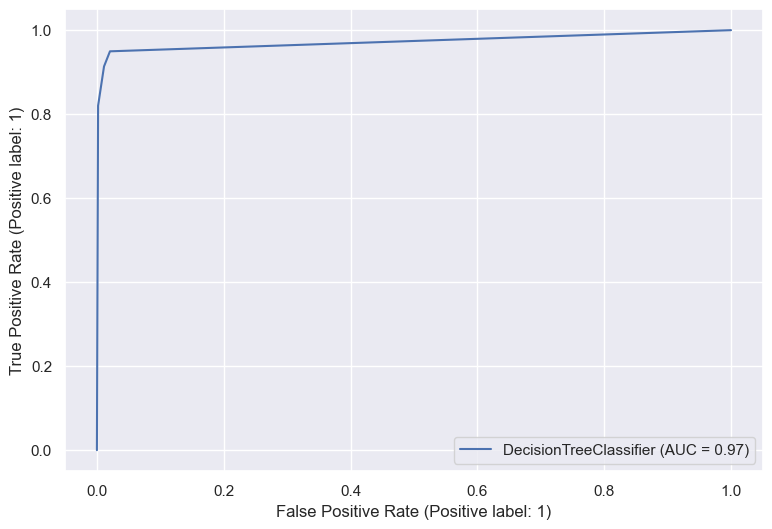

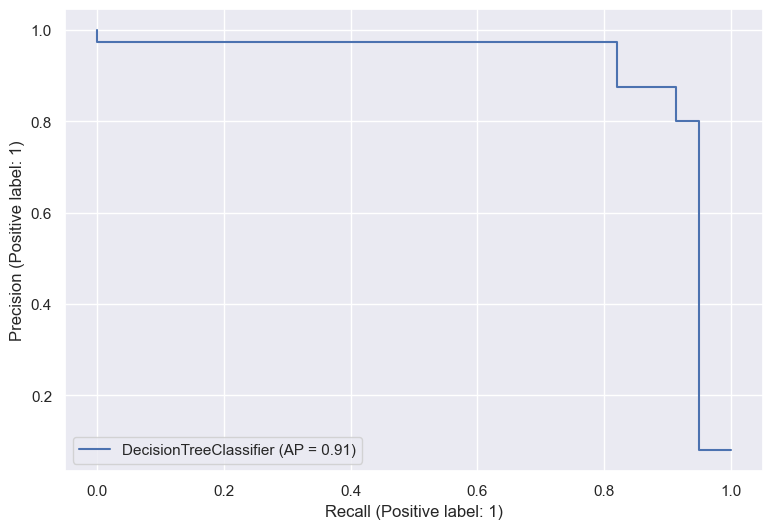

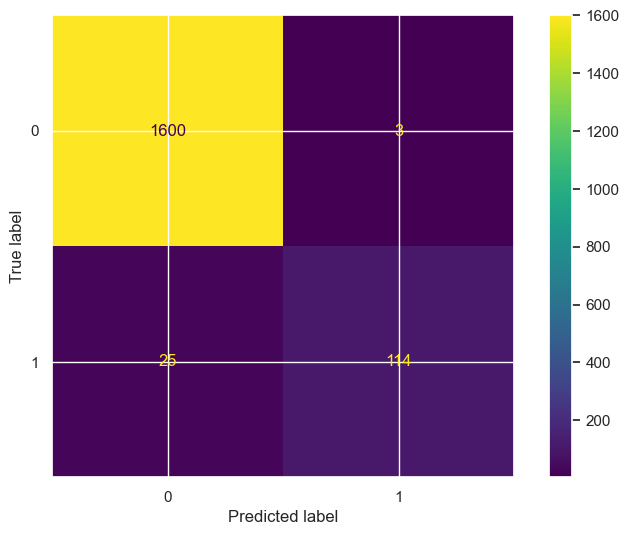

In [301]:
all_metrics(best_tree, X_test, y_test)